<a href="https://colab.research.google.com/github/harrisontg57/NLP_Spring_2021/blob/main/Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tim Harrison
Exam 1
Student ID: 002-24-5948

In [24]:
#Handling file imports here and creating dataframes
from os import walk
import numpy as np
import pandas as pd
import random
import re
random.seed(12345)

_, _, filenames_neg = next(walk("TRAINING/negative"))
_, _, filenames_pos = next(walk("TRAINING/positive"))
#print(filenames_neg[0:10])
ones = [1] * len(filenames_pos)
zeroes = [0] * len(filenames_neg)
pos_txt = []
for name in filenames_pos:
  with open('/content/TRAINING/positive/'+name, 'r') as file:
      d = file.read().replace('\n', ' ')
      #removing those html tags
      re.sub('<.*?>', ' ', d)
      pos_txt.append(d)
df_pos = pd.DataFrame(data={'text': pos_txt, 'sentiment': ones})
neg_txt = []
for name in filenames_neg:
  with open('/content/TRAINING/negative/'+name, 'r') as file:
      d = file.read().replace('\n', ' ')
      neg_txt.append(d)
df_neg = pd.DataFrame(data={'text': neg_txt, 'sentiment': zeroes})

#df_neg.sample(frac=0.75,random_state=12345)

data = df_pos.append(df_neg)
#data.sample(frac=0.75,random_state=12345)

Question 1)

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, FeatureUnion

def create_model(alg_name, vectorization, train):
  if alg_name == "naive_bayes":
    learn = MultinomialNB()
  elif alg_name == "perceptron":
    learn = Perceptron()
  elif alg_name == "logistic_regression":
    learn = LogisticRegression()
  elif alg_name == "random_forest":
    learn = RandomForestClassifier()
  elif alg_name == "svm":
    learn = SVC()
  else:
    raise NameError('incorrect algorithm name')

  if vectorization == "tfidf":
    vect = TfidfVectorizer()
  elif vectorization == "bag_of_words":
    vect = CountVectorizer()
  elif vectorization == "both":
    vect = FeatureUnion([("tfidf", TfidfVectorizer()), ("bag_of_words", CountVectorizer())])
  else:
    raise NameError('incorrect vectorization name')
  
  model = make_pipeline(vect, learn)
  model.fit(train.text, train.sentiment)
  return model


Question 2)

In [7]:
from sklearn.model_selection import train_test_split
train_a, test_a = train_test_split(data, test_size=0.25,random_state=12345)
model_a = create_model("naive_bayes","both",train_a)

train_b, test_b = train_test_split(data, test_size=0.30,random_state=12345)
model_b = create_model("random_forest","both",train_b)

train_c, test_c = train_test_split(data, test_size=0.40,random_state=12345)
model_c = create_model("svm","both",train_c)


Question 3)

A) Model A (naive bayes) performs best in all metrics except recall, since we know our comments are independent of each other this makes sense.

B) Mixing up testing sets would mean we were reusing some training data when testing since the different testing sets are randomly generated.  Which would make our validation methods inaccurate.

In [58]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
labels_a = model_a.predict(test_a.text)
results_a = pd.DataFrame(data={'text': test_a.text, 'true_sentiment': test_a.sentiment, 'modeled_sentiment': labels_a})

scores_a = pd.DataFrame(data={'model': 'model_a', 'training_portion': [0.75], 'test_portion': [0.25], 'accuracy':accuracy_score(test_a.sentiment,labels_a),'precision':precision_score(test_a.sentiment,labels_a),'recall':recall_score(test_a.sentiment,labels_a),'f1-score':f1_score(test_a.sentiment,labels_a)})


labels_b = model_b.predict(test_b.text)
results_b = pd.DataFrame(data={'text': test_b.text, 'true_sentiment': test_b.sentiment, 'modeled_sentiment': labels_b})

scores_b = pd.DataFrame(data={'model': 'model_b', 'training_portion': [0.70], 'test_portion': [0.30], 'accuracy':accuracy_score(test_b.sentiment,labels_b),'precision':precision_score(test_b.sentiment,labels_b),'recall':recall_score(test_b.sentiment,labels_b),'f1-score':f1_score(test_b.sentiment,labels_b)})


labels_c = model_c.predict(test_c.text)
results_c = pd.DataFrame(data={'text': test_c.text, 'true_sentiment': test_c.sentiment, 'modeled_sentiment': labels_c})

scores_c = pd.DataFrame(data={'model': 'model_c', 'training_portion': [0.60], 'test_portion': [0.40], 'accuracy':accuracy_score(test_c.sentiment,labels_c),'precision':precision_score(test_c.sentiment,labels_c),'recall':recall_score(test_c.sentiment,labels_c),'f1-score':f1_score(test_c.sentiment,labels_c)})

scores = scores_a.append(scores_b)
scores = scores.append(scores_c)
scores

,model,training_portion,test_portion,accuracy,precision,recall,f1-score
0,model_a,0.75,0.25,0.861264,0.856828,0.915294,0.885097
0,model_b,0.70,0.30,0.805269,0.778878,0.929134,0.847397
0,model_c,0.60,0.40,0.743127,0.732034,0.883824,0.800799


Question 4)

In [44]:
_, _, filenames = next(walk("UNLABELED"))
#print(filenames)
txt = []
for name in filenames:
  with open('/content/UNLABELED/'+name, 'r') as file:
      d = file.read().replace('\n', ' ')
      #removing those html tags
      re.sub('<.*?>', ' ', d)
      txt.append(d)

predicts = model_a.predict(txt)

for i,x in enumerate(filenames):
  print(x + "  Prediction: " + str(predicts[i]))

46278_0.txt  Prediction: 1
36517_0.txt  Prediction: 0
24221_0.txt  Prediction: 1
46705_0.txt  Prediction: 1
37154_0.txt  Prediction: 1
0_0.txt  Prediction: 1
36022_0.txt  Prediction: 1
36149_0.txt  Prediction: 1
35991_0.txt  Prediction: 1
49990_0.txt  Prediction: 1
35968_0.txt  Prediction: 1


46278_0.txt  Prediction: 1  Probably Accurate, describes actors experience while filming

36517_0.txt  Prediction: 0  Definitely negative, refers to it as the worst movie ever made 

24221_0.txt  Prediction: 1  Probably a negative review, writer complains 

46705_0.txt  Prediction: 1  Definitely negative, they rate it 1/10

37154_0.txt  Prediction: 1  Definiteluy negative, they rate it 3/10

0_0.txt  Prediction: 1  Accurate, they seem to have enjoyed it

36022_0.txt  Prediction: 1  Probably correct, short comment that doesn't really express an opinion on the film 

36149_0.txt  Prediction: 1  Probably wrong, they seem to have disliked the movie

35991_0.txt  Prediction: 1  Probably wrongly labeled, they disliked the film

49990_0.txt  Prediction: 1  Wrongly labeld, they gave the film a D+ rating

35968_0.txt  Prediction: 1  Accurate enough, the review doesn't really express strong support or hatred.

Question 5)

Labeling by comment number leaves an ugly image that takes signficantly longer to generate

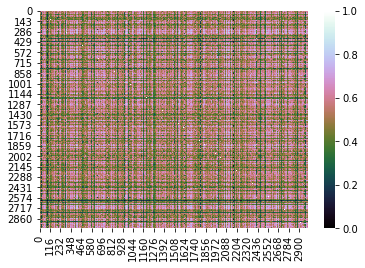

In [32]:
#reusing my code from homework 2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

fnames = filenames_pos[:]
fnames.extend(filenames_neg)
vect = CountVectorizer()
vector_matrix = vect.fit_transform(data['text'])
cosine_similarity_matrix = cosine_similarity(vector_matrix)
#print(cosine_similarity_matrix)
#xticklabels=filenames_neg
#print(len(fnames))
sns.heatmap(cosine_similarity_matrix,cmap=sns.color_palette("cubehelix", as_cmap=True))

Question 6)

The majority of the top 50 comment pairs belong to the same (positive or negative) class.  The similar comment pairs that cross classes seem to be longer and contain words and phrases commonly (at least in my mind) associated with film school analysis / cinema buffs.  Essentially it is the same as two physics papers on very different topics looking more similar to each other than one physics and one math paper both on a closely related topic because physicists and mathemeticians tend to use different notations.

In [33]:
#Reusing my homework code.
def top_n(m,n):
  li = []
  i = np.identity(len(fnames))
  df =  pd.DataFrame(data=m,index=fnames,columns=fnames)
  ident = pd.DataFrame(data=i,index=fnames,columns=fnames)
  no_ones = df.sub(ident)
  for k in range(n):
    top = np.argmax(no_ones)
    li.append((fnames[int(top/len(fnames))],fnames[top%len(fnames)]))
    no_ones.at[fnames[int(top/len(fnames))],fnames[top%len(fnames)]] = 0
    no_ones.at[fnames[top%len(fnames)],fnames[int(top/len(fnames))]] = 0
  return li

top_n(cosine_similarity_matrix,50)

[('216_4.txt', '215_4.txt'),
 ('1327_9.txt', '1330_9.txt'),
 ('996_9.txt', '995_9.txt'),
 ('1307_10.txt', '1309_10.txt'),
 ('1558_10.txt', '1557_10.txt'),
 ('646_9.txt', '644_9.txt'),
 ('972_9.txt', '973_9.txt'),
 ('12_9.txt', '11_9.txt'),
 ('1603_9.txt', '1604_9.txt'),
 ('3861_4.txt', '3860_4.txt'),
 ('1521_8.txt', '1522_8.txt'),
 ('1719_7.txt', '1722_7.txt'),
 ('827_7.txt', '812_10.txt'),
 ('1129_10.txt', '1521_8.txt'),
 ('827_7.txt', '820_10.txt'),
 ('1129_10.txt', '827_7.txt'),
 ('827_7.txt', '815_7.txt'),
 ('1129_10.txt', '1445_8.txt'),
 ('827_7.txt', '819_10.txt'),
 ('1129_10.txt', '6067_1.txt'),
 ('507_10.txt', '552_8.txt'),
 ('1521_8.txt', '1505_9.txt'),
 ('827_7.txt', '1521_8.txt'),
 ('1507_8.txt', '1521_8.txt'),
 ('552_8.txt', '967_7.txt'),
 ('507_10.txt', '812_10.txt'),
 ('1129_10.txt', '1722_7.txt'),
 ('1129_10.txt', '1719_7.txt'),
 ('1129_10.txt', '29_4.txt'),
 ('821_10.txt', '815_7.txt'),
 ('1129_10.txt', '1427_9.txt'),
 ('820_10.txt', '812_10.txt'),
 ('1129_10.txt', '815

Question 7)
The results are 35996 Negative Verbs with 54429 Negative Nouns and 45610 Positive Verbs with 72895 Positive Nouns. 

(NOTE: this took a while to compute so I've limited the code to the first 250 positive comments and first 250 negative comments) 

The positive comments have significantly more verbs and nouns.  However the ratios of verbs to nouns are similar in both positive and negative reviews, so I suspect this is simply due to people wanting to write more about movies they enjoyed.

In [69]:
import spacy
nlp = spacy.load("en_core_web_sm")
#en_core_web_sm should be perfect for our short movie reviews.
nouns_neg = 0
verbs_neg = 0
for comment in neg_txt[0:250]: #Remove the '[0:250]' for complete analysis
  sentences = comment.split('.')
  for s in sentences:
    sentence = nlp(s)
    for t in sentence:
      if t.pos_ == "NOUN":
        nouns_neg += 1
      if t.pos_ == "VERB":
        verbs_neg += 1
print(verbs_neg)
print(nouns_neg)

nouns_pos = 0
verbs_pos = 0
for comment in pos_txt[0:250]: #Remove the '[0:250]' for complete analysis
  sentences = comment.split('.')
  for s in sentences:
    sentence = nlp(s)
    for t in sentence:
      if t.pos_ == "NOUN":
        nouns_pos += 1
      if t.pos_ == "VERB":
        verbs_pos += 1

print(verbs_pos)
print(nouns_pos)

35996
54429
45610
72895


In [70]:
print(35996/54429)
print(45610/72895)

0.6613386246302523
0.6256944920776459


Question 8)

I cannot get the same counts as the POS tagger detects on a token basis where as regex detects on a character basis.  Thus '....' or '...' appear as unique tokens for spacy whereas with regex I can either detect them as the same token '\.\.+' or separately as '\.\.\.' and '\.\.\.\.'  and there are too many unique punctuations to separately detect them with regex without excessive code and preknowledge of all the usages in the texts.

In [64]:
import spacy
nlp = spacy.load("en_core_web_sm")
punct = {}
for comment in neg_txt[0:250]: #Remove the '[0:250]' for complete analysis
  s = nlp(comment)
  for t in s:
    if t.pos_ == "PUNCT":
      if t.text in punct:
        #print(t.text)
        punct[t.text] += 1
      else:
        #print(t)
        punct[t.text] = 1
for comment in pos_txt[0:250]: #Remove the '[0:250]' for complete analysis
  s = nlp(comment)
  for t in s:
    if t.pos_ == "PUNCT":
      if t.text in punct:
        punct[t.text] += 1
      else:
        punct[t.text] = 1
#print(sorted(punct.values(),reverse=True))
print(sorted(punct.items(), key=lambda x:x[1], reverse=True)[:10])
punct2 = {',':0,'.':0,'"':0,'-':0,'(':0,')':0,'!':0,"'":0,'?':0,':':0,'...':0}

for comment in neg_txt[0:250]:
  punct2[','] += len(re.findall(r',',comment))
  punct2['.'] += len(re.findall(r'\. ',comment))
  punct2['"'] += len(re.findall(r'"',comment))
  punct2['-'] += len(re.findall(r'\-',comment))
  punct2['('] += len(re.findall(r'\(',comment))
  punct2[')'] += len(re.findall(r'\)',comment))
  punct2['!'] += len(re.findall(r'!',comment))
  punct2['\''] += len(re.findall(r'\'',comment))
  punct2['?'] += len(re.findall(r'\?',comment))
  punct2[':'] += len(re.findall(r':',comment))
  punct2['...'] += len(re.findall(r'\.\.\.',comment))

for comment in pos_txt[0:250]:
  punct2[','] += len(re.findall(r',',comment))
  punct2['.'] += len(re.findall(r'\. ',comment))
  punct2['"'] += len(re.findall(r'"',comment))
  punct2['-'] += len(re.findall(r'\-',comment))
  punct2['('] += len(re.findall(r'\(',comment))
  punct2[')'] += len(re.findall(r'\)',comment))
  punct2['!'] += len(re.findall(r'!',comment))
  punct2['\''] += len(re.findall(r'\'',comment))
  punct2['?'] += len(re.findall(r'\?',comment))
  punct2[':'] += len(re.findall(r':',comment))
  punct2['...'] += len(re.findall(r'\.\.\.',comment))
print(sorted(punct2.items(), key=lambda x:x[1], reverse=True)[:10])

[(',', 5494), ('.', 4723), ('"', 1023), ('-', 891), ('(', 598), (')', 590), ('!', 414), ("'", 334), ('?', 293), (':', 205)]
[(',', 5514), ('.', 4473), ("'", 2599), ('-', 1292), ('"', 1072), (')', 647), ('(', 641), ('!', 488), ('?', 320), ('...', 274)]
